# 0.) Import and Clean data

In [1]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
names = df[['country']].copy()
X = df.drop(['country'], axis=1)

In [4]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [5]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

/Users/clairewei/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [6]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

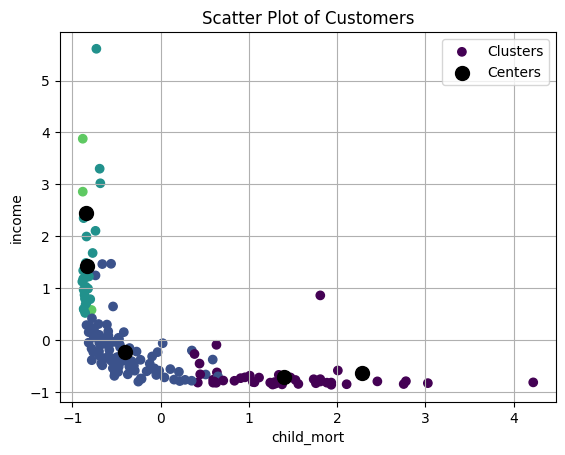

In [7]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 4


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [8]:
WCSSs = []
Ks = range(1, 15)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init=30, init='random')
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [9]:
# BONUS OPTIONAL
WCSSs = [KMeans(n_clusters=k, n_init=30, init='random').fit(X_scaled).inertia_ for k in Ks]

In [10]:
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 628.594795700674,
 574.4439219146414,
 503.4195573164901,
 458.05723488232775,
 424.78258092349677,
 400.82866795825817,
 374.64167900940805,
 353.23845667807063,
 337.1364100119397,
 313.4939233522148]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

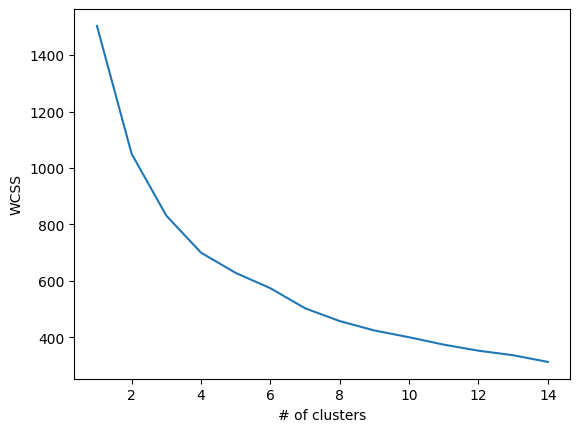

In [11]:
plt.plot(Ks, WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

# 6.) Do the same for a silhoutte plot

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
SCs = []
Ks = range(2, 15)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init=30, init='random')
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled, kmeans.labels_))


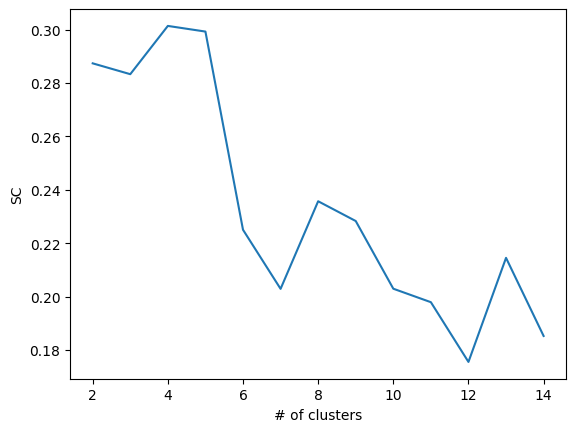

In [14]:
plt.plot(Ks, SCs)
plt.xlabel('# of clusters')
plt.ylabel('SC')
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [15]:
kmeans = KMeans(n_clusters=2, n_init=30, init='random').fit(X_scaled)

In [16]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [17]:
output = pd.concat([preds, df], axis=1)
output
print('Cluster1:')
list(output.loc[output[0] == 0, 'country'])

Cluster1:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [18]:
print('Cluster1:')
list(output.loc[output[0] == 1, 'country'])

Cluster1:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [19]:
output.drop(['country'], axis=1).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


# 9.) Write an observation about the descriptive statistics.

Countries with higher income tend to have lower children mortality rate.